# Supervised methods. Classification


In machine learning, the process of tackling a problem is as follows:

*   Study the data.
*   Select a model.
* Trained it on the training data (i.e., the learning algorithm searched for the
model parameter values that minimize a cost function).
* Apply the model to make predictions on new cases (this is called inference), hoping that this model will generalize well.

####Studying data and preprocessing it.
In order for a technique to perform well, we need first to analyse the data we are dealing with. Further we list some main chalenges:

1.   **Insufficient Quantity of Training Data**
2.   **Nonrepresentative Training Data**: in order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to.
3.  **Poor-Quality Data** : if your training data is full of errors, outliers, and noise (e.g., due to poorquality
measurements), it will make it harder for the system to detect the underlying
patterns, so your system is less likely to perform well $⇒$ **Clean data**
4. **Irrelevant Features**: As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant
ones. $⇒$ **Feature engineering**





#### Cleaning data


*   If some instances are clearly outliers, it may help to simply discard them or try to
fix the errors manually.
*   If some instances are missing a few features (e.g., 5% of your customers did not
specify their age), you must decide whether you want to ignore this attribute altogether,
ignore these instances, fill in the missing values (e.g., with the median
age), or train one model with the feature and one model without it, and so on.



## Binary classification. Logistic Regression.

**Logistic regression** is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is usually a binary outcome (1/0, Yes/No, True/False). It's used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

While linear regression predicts a continuous outcome, logistic regression predicts the probability of an event occurrence. The hypothesis function for logistic regression is

\begin{equation}
h_\theta(x) = \frac{1}{1 + e^{-\theta^\top x}} = \sigma(\theta^\top x) \tag{12}
\end{equation}

where:
- $ h_\theta(x) $ is the predicted output
- $ \theta $ is the set of parameters
- $ x $ is the input feature
- The function $ \frac{1}{1 + e^{-z}} $ is the Sigmoid function, which outputs values between 0 and 1.



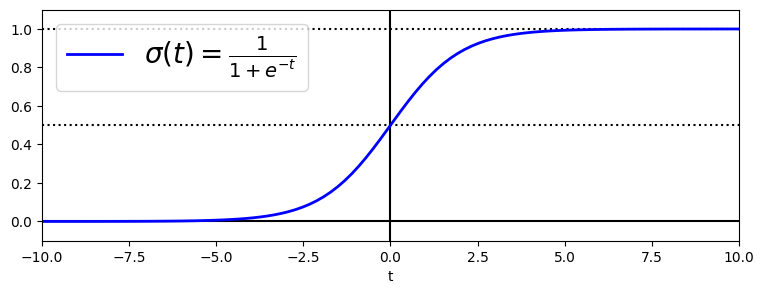

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

As mentioned the logistic regresion returns the probability of an event to occure. So we make the following interpretation:

\begin{equation}
h_\theta(X) = \frac{1}{1 + e^{-\theta^\top X}} = P(y=1|X, \theta)
\end{equation}

Considering the fundamental theory of probabilities, i.e., the sum of the probabilities is one, we have:

\begin{equation}
P(y=0|X, \theta) = 1- P(y=0|X, \theta).
\end{equation}

Further, in order to compute the *Likelihood function*, we assume that the instances are indepedent and have the Bernoulli distribution. Thus, we obtain:
$$
\begin{aligned}
L(\theta \mid y, x) & =\mathrm{P}(Y \mid X, \theta)=\prod_{i=1}^m \mathrm{P}\left(y^{(i)} \mid x^{(i)}, \theta\right) =\prod_{i=1}^m h_\theta\left(x^{(i)}\right)^{y^{(i)}}\left(1-h_\theta\left(x^{(i)}\right)\right)^{\left(1-y^{(i)}\right)} .
\end{aligned}
$$

Further, we take the logarithm in the previous expression and maximize it:
$$
\hat{\theta} = \text{argmax}_{\theta} \frac{1}{m}\sum_{i=1}^m \log  h_\theta\left(x^{(i)}\right)^{y^{(i)}} + \log \left(1-h_\theta\left(x^{(i)}\right)\right)^{\left(1-y^{(i)}\right)}
$$

To train a logistic regression model, we need to find parameters $ \theta $ such that the cost function is minimized

\begin{equation}
J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] \tag{13}
\end{equation}

where $ m $ is the number of training examples and $y$ is the label. One method to find the optimal parameters is the gradient method. Further, we provide the ingredients for implementing the GD method.

The gradient of the cost function is:
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \tag{14}
\end{equation}

Logistic regression optimization using gradient descent revolves around minimizing the log-loss, a measure of the difference between predicted probabilities and actual labels. The key to this iterative optimization is computing the gradient of the cost with respect to the model's weights. The gradient, given by

\begin{equation}
\nabla J(\theta) = \frac{1}{m} X^T (\sigma(X\theta) - y)
\end{equation}

where $ \sigma $ is the sigmoid function, indicates the direction of steepest ascent in the cost function. To minimize the cost, weights are updated in the direction opposite to the gradient using the formula

\begin{equation}
\theta_{k + 1} = \theta_{k} - \alpha \nabla J(\theta_{k})
\end{equation}

Here, $ \alpha $ is the learning rate, determining the step size. The process is repeated until the changes in the cost function become negligible or a set number of iterations is reached. Adjusting the learning rate is crucial: a high value can cause divergence, while a low value may lead to slow convergence. There are also more reliable methods for choosing the learning rate, such as the **Lipschitz constant**.

In [16]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 2:]  # petal width
#y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0
y = (iris["target"] == 2)

# [Assesment 1]: Use LogisticRegression class to train the model for the above data.
# Use train_test_split to divide your data in training and testing data. Use 15% for testing.
# What mean accuracy you obtain?


X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.15)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))


Train Shape (127, 2)
Test Shape (23, 2)
The accuracy of the Logistic Regression is 1.0


### Multiclass classification. Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers. This is called *Softmax Regression*, or *Multinomial Logistic Regression*.

The idea is quite simple: when given an instance $x$, the Softmax Regression model
first computes a score $s_k(x)$ for each class $k$, then estimates the probability of each
class by applying the *softmax function* (also called the normalized exponential) to the
scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation
for Linear Regression prediction:

$$s_k(x) = \theta_k^T x  $$.

Note that each class has its own dedicated parameter vector $\theta_k$. All these vectors are
typically stored as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance $x$, you can estimate
the probability $p_k$ that the instance belongs to class $k$ by running the scores through the softmax function :

$$ \hat{p}_k = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{j=1}^{K} e^{s_j(x)}}$$,

where
* $K$: the number of classes
* $s(x)$: a vector containing the scores of each class for the instance $x$
* $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.

Just like the *Logistic Regression classifier*, the *Softmax Regression classifier* predicts the class with the highest estimated probability:

$$ \hat{y} = \text{argmax}_{k} \sigma(s(x))_k $$


In [ ]:
"""[Assesment 2]: Activate in the LogisticRegression class the multiclass option
and use it on the all iris database (the database initially has three classes).
What average accuracy you obtain?
"""

X=iris.data
Y=iris.target

log_reg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=3)
log_reg.fit(X_train, Y_train)

from sklearn import metrics

Y_pred = log_reg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))


1.0


###Homework (10p)
Make a document (.pdf) or a colab file (.ipynb) that contains a classification problem of your choice. The following points must be met:


1.(2p) Data proessing
 * Find a different dataset than the one used in the current lab and analyse it. Some open data repositories: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), [Kaggle datasets](https://www.kaggle.com/datasets), etc.
 * Analyse the data and make the appropriate cleaning and processing decisions (example: scaletion, normalization, min-max scalation).

2.(4p) Choose a model
 * Describe the model you choose (problem formulation) and the learning algorithm you will use. Examples of classifiers: SVM, Decision trees, KNN, Naiv Bayes, etc. (Do not use Neural Networks approaches.)    
 * Modify at least one default value from the parameters in the class function you implement.  

3.(2p) Train the model and evaluate it.

4.(2p) Compare the performance with Logistic regression/Softmax regression.

**If you choose to provide a document file, you also need to upload on moodle the code**.

                          0         1         2             3         4
Loan_ID            LP001002  LP001003  LP001005      LP001006  LP001008
Gender                 Male      Male      Male          Male      Male
Married                  No       Yes       Yes           Yes        No
Dependents                0         1         0             0         0
Education          Graduate  Graduate  Graduate  Not Graduate  Graduate
Self_Employed            No        No       Yes            No        No
ApplicantIncome        5849      4583      3000          2583      6000
CoapplicantIncome       0.0    1508.0       0.0        2358.0       0.0
LoanAmount              NaN     128.0      66.0         120.0     141.0
Loan_Amount_Term      360.0     360.0     360.0         360.0     360.0
Credit_History          1.0       1.0       1.0           1.0       1.0
Property_Area         Urban     Rural     Urban         Urban     Urban
Loan_Status               Y         N         Y             Y   

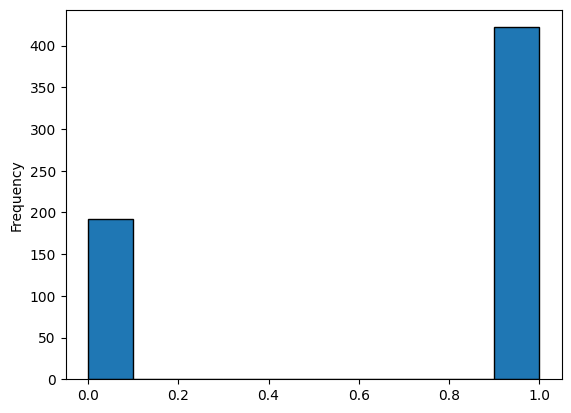

In [38]:
## Importam librariile si functiile de care o sa avem nevoie

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## Am ales datasetul de aici: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
## Este vorba despre predictia statusului acordarii de imprumut bancar catre o persoana, in functie de mai multe atribute.
## Am inclus fisierul de train de care avem nevoie, dar o sa fie incarcat si pe moodle.

df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

print(df.head(5).T)
print("\n<------------------------------------------------> Inainte de completare: ")
print(df.isnull().sum())

## Dupa cum vedem, avem foarte multe coloane care au valori nule, deci putem fie sa eliminam inregistrarile fie sa completam cu niste
# date care nu o sa afecteze.
# Am rulat programul in ambele cazuri si avem valori foarte similare pentru acuratete, deci o sa aleg cazul in care competam cu date.


## Completam datele numerice cu media coloanei respective.

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

## Completam datele care nu sunt numerice cu cea mai comuna valoare care apare in coloana respectiva.

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

print("\n<------------------------------------------------> Dupa completare: ")
print(df.isnull().sum())

## Eliminam coloanele de care nu avem nevoie in clasificare.

cols = ['CoapplicantIncome','Loan_ID']
df = df.drop(columns = cols,axis= 1)

## Convertim aici valorile care nu sunt numerice in valori numerice.
# Exemplu : Y --> 1 si N --> 0

cols = ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

## Ilustram proportionalitatea celor doua tipuri de inregistrari.

df['Loan_Status'].plot(kind='hist', edgecolor='black')

## Specificam intrarile pentru algoritmii de mai jos.

y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'], axis = 1)

## Normalizam setul de date.

X = preprocessing.normalize(X)

## Scalam setul de date.

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

## Impartim setul de date in train si test, deoarece avem fisier separat de test, dar nu avem statusul, deci nu putem verifica.

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state=0)

print("\n<------------------------------------------------>\n")
print("Train Shape =======> ",X_train.shape)
print("Test Shape  =======> ",X_test.shape)

## Folosim SVM pentru clasificare.

SVM = svm.SVC(C=1.5, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)

## Folosim LogisticRegression pentru clasificare.

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
predictions_LR = log_reg.predict(X_test)

## Folosim DecisionTree pentru clasificare.

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predictions_CLF = clf.predict(X_test)

## Calculam acuratetea clasificarii.

print("\n<------------------------------------------------>\n")
print("SVM ================> ", accuracy_score(predictions_SVM, y_test)*100)
print("\n<------------------------------------------------>\n")
print("LogisticRegression => ", accuracy_score(predictions_LR, y_test)*100)
print("\n<------------------------------------------------>\n")
print("DecisionTree =======> ", accuracy_score(predictions_CLF, y_test)*100)
print("\n<------------------------------------------------>\n")



